# Lab 2:  Loss and risk
Welcome to the second Data 102 lab! 

The goal of this lab is to introduce loss functions in hypothesis testing problems.

The code and responses you need to write are commented out with a message **"TODO: fill ..."**. There is additional documentation for each part as you go along.


## Collaboration Policy
Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

## Submission
To submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.

**We encourage you to finish this assignment by Thursday, Feb. 04.**

**For full credit, this assignment should be completed and submitted before Sunday, Feb 07, 2021 at 11:59 PM. PST**

## Collaborators
Write the names of your collaborators in this cell.

`<Collaborator Name> <Collaborator e-mail>`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import itertools
from ipywidgets import interact, interactive

import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

# Question 0: Review

### a) Which method controls the FWER and FDR?

Fill in the below code block:

In [2]:
ans0a = "Bonferroni" # TODO: fill in either "Bonferroni" or "BH" as a string.

In [3]:
assert(get_hash(ans0a) == '0472c4e87e75747ecd0116f287c2cc2d')
print("Passed!")

Passed!


### b) Is FWER $\leq$ FDR?

In [4]:
ans0b = False # TODO: fill in either True or False as a boolean.

In [5]:
assert(get_hash(ans0b) == 'f8320b26d30ab433c5a54546d21f414c')
print("Passed!")

Passed!


### c) Benjamini-Hochberg procedure practice

We have 10 $p$-values for multiple hypothesis testing: $0.001$, $0.003$, $0.012$, $0.015$, $0.08$, $0.09$, $0.1$, $0.14$, $0.16$, $0.28$. Suppose we would like to control the FDR at the level $\alpha = 0.05$. How many tests are rejected?

In [6]:
ans0c = 4 # TODO: fill in with an integer. 

In [7]:
assert(get_hash(ans0c) == 'a87ff679a2f3e71d9181a67b7542122c')
print("Passed!")

Passed!


# Question 1: Custom Loss Functions for Hypothesis Testing

The first question looks at a medical diagnostic decisions. For each person that undergoes testing, the null hypothesis is that they don't have the virus, and the alternative is that they do.

_The null hypothesis_ $H_0$: Person $X$ does not have the virus.

_The alternative hypothesis_ $H_1$: Person $X$ has the virus.

Suppose that you devise a test which takes some measurements from each test subject and then computes a corresponding p-value.

Last week we looked at several approaches for controllling False Positive Rate (FPR), Family Wise Error Rate (FWER) and False Discovery Rate (FDR). However, they all have some drawbacks for medical decision making: FPR and FWER do not depend on the prevalence of the disease and neither of them allows a decision maker to consider different misclassification costs arising from false-negative and false-positive diagnoses.

When making medical decisions, wrong diagnoses carry different costs. Deciding that a patient does not have the virus when in reality they do is a **False Negative**. The potential consequences of such decision are severe: lack of treatment, risk of infecting others, and even premature death.

On the other hand, deciding that a patient has the virus when in reality they don't is a **False Positive**. The potential consequences of that include distress, unnecesary treatment and costs of subsequent testing. This is certainly not ideal, but less severe than the consequences of a false negative.

We've previously evaluated decisions in terms of their TPR and FPR, and showed how ROC curves demonstrate the trade-off curve between the two quantities. We saw that it is not always clear how to choose the best trade-off.

A very popular way of choosing the trade-off, and simultaneously comparing different procedures, is the idea of **risk** that we learnt in Lecture 5. Here, the analyst constructs a loss function by specifying the **cost** of making each type of mistake.


Let's assume that we estimate the cost of making a false negative mistake to be $k$-times larger than the cost of a false positive. We can express that via a **loss function**:


### Checkpoint: fill in the missing value here

$$\begin{cases} \mathcal{l}(D=1|R=0) = 1\\
\mathcal{l}(D=0|R=1) = ~?\\
\mathcal{l}(D=0|R=0)=\mathcal{l}(D=1|R=1) = 0\end{cases}$$

### Checkpoint: Does FPR and FWER depend on the prevalence of the disease?

...

`TODO: fill in with your answer`

### Checkpoint: Above, you were given one example of when the consequences of a False Negative is more sever than the consequences of a False Positive. Come up with one example of the opposite: when the consequences of a False Positive is more severe than the consequences of a False Negative. 

...

`TODO: fill in with your answer`


## 1.a: Compute average empirical loss

Assume we have a sample of $N$ patients for which a test outputs the following confusion matrix: 

|             | Decision = 0 | Decision = 1 |
|-------------|--------------|--------------|
| Reality = 0 | TN           | FP           |
| Reality = 1 | FN           | TP           |

### Compute the average loss this procedure incurs by summing up the losses for every mis-diagnosis and then dividing by the total number of tests.

In [8]:
# TODO: fill in
def compute_average_loss(results_dictionary, factor_k):
    """ Function that computes average loss for a given confusion matrix and a multiplicaltive
        k_factor that compares the consequences of false nagatives and false positives.
        
        Inputs:
            results_dictionary : a dictionary with the counts of TP, FP, TN and FN
            k_factor : float, quantifies the ratio of the negative consequences of
                       false negatives compared to false positives
                       
        Outputs:
            average_loss : float
    """
    
    TP_count = results_dictionary['TP_count']
    FP_count = results_dictionary['FP_count']
    TN_count = results_dictionary['TN_count']
    FN_count = results_dictionary['FN_count']
    
    
    N = TP_count + TN_count + FP_count + FN_count
    average_loss = (FP_count + FN_count*factor_k)/N # TODO: fill in
    return(average_loss)

In [9]:
# Running validation tests: Do not modify
res_dict = {'TP_count': 100, 'FP_count': 20, 'TN_count':450, 'FN_count':30}
k_factors = [0, 10, 100]
hash_list = ['ab51c1986c756154d0e3feb4f5a5e829','91f25a837f3db78306b0ad2ef0437ff9','3fc1803a77013426e6707b041de152db']
for i, k in enumerate(k_factors):
    average_loss = compute_average_loss(res_dict, k)
    print("For k = {}, the average loss is {:.3f}".format(k, average_loss))
    assert hash_list[i] == get_hash(average_loss)
print('Test passed!')

For k = 0, the average loss is 0.033
For k = 10, the average loss is 0.533
For k = 100, the average loss is 5.033
Test passed!


## 1.b: Compute the average loss (empirical risk) with respect to various levels $\alpha$

In this part we will use a simple test that rejects the null hypothesis whenever the p-value of a patient is smaller than some level $\alpha$. 

Our goal is to investigate the performance of the test at different levels with respect to the custom loss defined in **1.a**. 

Hint: Recall the naive test from Lab 1.

In [10]:
# Note: don't make any changes to this function, this is exatly the naive thresholding you completed in Lab 1
def alpha_threshold_decisions(p_values, alpha):
    """
    Returns decisions on p-values using naive thresholding.
    
    Inputs:
        p_values: array of p-values
        alpha: threshold (significance level)
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant at level `alpha`, and 0 otherwize
    """
    decisions = p_values <= alpha
    return decisions

Let's also bring in from Lab 01 the function that computes the counts of TP, TN, FP, FN by comparing the decision to the reality.

In [11]:
# Note: don't make any changes to this function, this is the report_results function you completed in Lab 1
def report_results(decisions, reality):
    """
    Produces a dictionary with counts for the true positives, true negatives,
    false negatives, and false positives from the input `decisions`
    and `reality` arrays.
    
    Inputs:
      decision: array of 0/1 values where 1 indicates that patient has the virus.
      reality: array of 0/1 values where 1 indicates a draw from the alternative.
    
    Outputs: a dictionary of TN, TP, FN, and FP counts.
    """   
    
    TP_count = np.sum(decisions*reality)
    TN_count = np.sum((1-decisions)*(1-reality))
    FP_count = np.sum((decisions)*(1-reality))
    FN_count = np.sum((1-decisions)*(reality))
    
    results_dictionary = {"TN_count": TN_count,
                          "TP_count": TP_count,
                          "FN_count": FN_count,
                          "FP_count": FP_count,
                         }
    return results_dictionary

First, we will generate ground truth data. 

Assume there are $N$ subjects, out of which a fraction trully have the virus. This fraction is known as **prevalence**: $\mathbb{P}\{R=1\}$.

The function below generates p-values associated with each test subject. 

In [12]:
# Note: don't make any changes to this function
def generate_ground_truth(N, prevalence):
    """ Creates simulated p-values corresponding to N subjects at a 
    specified disease prevalence level"""
    rs = np.random.RandomState(1)
    reality = rs.binomial(1, prevalence, N)
    p_values = 1 - norm.cdf(rs.randn(N) + reality)
    return(p_values, reality)

In [13]:
# Generate p-values: Do not modify
N = 10000
prevalence = 0.1
p_values, reality = generate_ground_truth(N, prevalence)

### In the cell below complete the function that computes the average loss (empirical risk) for an $\alpha$ level test.

In [14]:
# TODO: complete the function
def compute_alpha_average_loss(p_values, reality, alpha, factor_k):
    """ 
    Computes the observed average loss for an alpha level test.
    
    Inputs:
        p_values: array of floats, p-value[i] is the p-values associated with test subject i.
        reality: array of 0/1s
        alpha: float, threshold for rejecting the null hypothesis
        factor_k: float, quantifies the ratio of the negative consequences of
                  false negatives compared to false positives
                  
    Outputs:
        average_loss: float, average observed loss
    """
    
    # HINT: Your code should take advantage of functions already defined in this notebook.
    
    decisions = alpha_threshold_decisions(p_values, alpha)
    results = report_results(decisions, reality)
    average_loss = compute_average_loss(results, factor_k)
    return average_loss

In [15]:
# Validation tests do not modify
alpha_values = [0.05, 0.1, 0.2, 0.4]
k_factors = [0, 10, 100]
inputs = list(itertools.product(alpha_values, k_factors))
outputs = [compute_alpha_average_loss(p_values, reality, *inp) for inp in inputs]

hash_list = ['8d0a5f87d0563079e70969b527b22b2c', '1370c7dde8b12484e1f9f3376ec72693', 
             'f106401a6d5ceaa1a89d99bcc773f8db', 'd92f2ab695c640d68b7b0f055704d892', 
             '066517035812371facdef5f27ff5c7c9', '91709ca4894f058b311f697527479564', 
             '49f12f9c625759e7bb9e3f2fe5cee530', '38888496421ef7c75527678f1e718c19', 
             '701a4e33513e8e55f91eac027a42b6fe', 'a6107b1736a62ac0c1c79546cc4ec85f', 
             'd1d940b705c4e66fc40cd8ea1c2f7c57', 'a57b99387860e7d6b6de25ea47201a0b']

for i, inp in enumerate(inputs):
    print('At level alpha={} and k={} the average loss is {:.3f}'.format(*inp, outputs[i]))
    assert(get_hash(outputs[i])==hash_list[i])
print('Test passed!')

At level alpha=0.05 and k=0 the average loss is 0.047
At level alpha=0.05 and k=10 the average loss is 0.743
At level alpha=0.05 and k=100 the average loss is 7.007
At level alpha=0.1 and k=0 the average loss is 0.097
At level alpha=0.1 and k=10 the average loss is 0.680
At level alpha=0.1 and k=100 the average loss is 5.936
At level alpha=0.2 and k=0 the average loss is 0.186
At level alpha=0.2 and k=10 the average loss is 0.614
At level alpha=0.2 and k=100 the average loss is 4.466
At level alpha=0.4 and k=0 the average loss is 0.369
At level alpha=0.4 and k=10 the average loss is 0.594
At level alpha=0.4 and k=100 the average loss is 2.619
Test passed!


## 1.c Investigate the average loss plot for different levels of disease prevalence 
The function below generates ground truth for a sample of 10000 subjects for a given disease prevalence. It then computes the average loss for diagnostic decisions at level $\alpha$, where $\alpha \in [0, 1]$ . Finally, it plots the resulting average loss (y axis) at a level $\alpha$ (x axis).

In [16]:
# Run this as is after completing the `compute_alpha_average_loss` function
# Do not modify
def plot_average_loss(prevalence, factor_k):
    N = 10000
    # generate ground truth
    p_values, reality = generate_ground_truth(N, prevalence)
    # vary alpha from 0 to 1
    alpha_array = np.arange(0,1, 0.05)
    # compute average loss for each alpha
    average_loss_array = [compute_alpha_average_loss(p_values, reality, alpha, factor_k) for alpha in alpha_array]
    optimal_alpha = alpha_array[np.argmin(average_loss_array)]
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_array, average_loss_array, label = 'Average Loss')
    plt.axvline(x=optimal_alpha, ls='--', label = 'Optimal $\\alpha$', c='green')
    plt.xlabel('$\\alpha$ level')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.show()  

In [17]:
# Visualize interactive plot: Do not modify
interactive_plot = interactive(plot_average_loss, prevalence=(0.001, 0.11, 0.01), factor_k=(0, 100, 5))
interactive_plot 

interactive(children=(FloatSlider(value=0.051000000000000004, description='prevalence', max=0.11, min=0.001, s…

1.c (i) Fix the `prevalence` of the disease at $0.05$ ($5\%$). Using the slider in the interactive plot above, try out different values for the multiplicative `factor_k`. What do you notice? How would you adjust your diagnosic procedure based on the value of `factor_k`? What combination of `factor_k` and $\alpha$ gives you the lowest possible loss, and why?

`TODO: fill in your response here`


1.c (ii) Fix `factor_k` at $50$ (meaning that the negative consequence of a false negative are 50 times larger than the negative consequences of a false positive). Using the slider in the interactive plot above, try out different values for the true prevalence of the disease. What do you notice? How would you adjust your diagnostic procedure based on the prevalence of the disease? What combination of prevalence and $\alpha$ gives you the lowest possible loss, and why?

`TODO: fill in your response here`



# Question 2.
In the previous question you played the role of a test designer or device manufacturer that needs to find an appropriate way to calibrate the test such that it minizes some desired loss. In this part put yourself in the shoes of a medical professional who is using this testing device without really knowing all the internals of it. 

The test kit claims a certain specificity ($1-FPR$) and sensitivity ($1-FNR$). 

Assume you have a new patient that came in and tested positive (you have only the binary output of the test). Your goal is to determine whether or not to put this patient through treatment.

To answer this we weill make the following assumptions:
- Assume as in part 1, that getting a false negative is $k$ times worse than getting a false positive.
- Assume that you know the `prevalence` of this disease.
- Assume that the test has a certain `specificity` and `sensitivity`.

## 2.a Compute the posterior
Complete function below to compute the posterior probability that the patient truly has the disease conditioned on a positive test result: namely, compute $\mathbb{P}\{R=1|D=1\}$ as a function of `prevalence`, `sensitivity` and `specificity`.

In [18]:
# TODO: complete the function
def compute_posterior_probability(prevalence, sensitivity, specificity):
    """ 
    Computes the posterior probability that the patient trully has the disease 
    conditioned on a positive test result.
    
    Inputs: 
        prevalence: float, fraction of the population that has the disease
        sensitivity: float, 1 - false negative rate
        specificity: float, 1 - false positive rate
        
    Outputs:
        posterior probability: probability that the patient has the disease given a positive test result
    """
    TP = sensitivity
    FP = 1 - specificity
    posterior_probability = (TP * prevalence) / (TP * prevalence + FP * (1-prevalence))
    return posterior_probability

*Hint: We've already seen this in HW1 and discussion 2*

In [19]:
# Let' compute a few posterior probabilities
prevalence = [0.001, 0.1]
sensitivity = 0.98
specificity = 0.99
print('Conditioned on a positive test result, with sensitivity {} and specificity {}:'.format(sensitivity, specificity))
print('For a low prevalence disesase ({}), the posterior probability that the test subject is truly positive is {:.3f}'.
      format(prevalence[0], compute_posterior_probability(prevalence[0], sensitivity, specificity)))
print('For a high prevalence disesase ({}), the posterior probability that the test subject is truly positive is {:.3f}'.
      format(prevalence[1], compute_posterior_probability(prevalence[1], sensitivity, specificity)))


Conditioned on a positive test result, with sensitivity 0.98 and specificity 0.99:
For a low prevalence disesase (0.001), the posterior probability that the test subject is truly positive is 0.089
For a high prevalence disesase (0.1), the posterior probability that the test subject is truly positive is 0.916


In [20]:
# Validation tests: Do not modify
prevalences = [0.001, 0.01, 0.1]
sensitivities = [1, 0.95, 0.9, 0.8]
specificities = [1, 0.99, 0.95, 0.9]
inputs = list(itertools.product(prevalences, sensitivities, specificities))
hash_list = ['e4c2e8edac362acab7123654b9e73432', '821e0d2e8ad5f72b93bd6fb0fc26f535', '236421e867622df2f607cdb5189c70d1', 
             'a9206adc53f2eb4d2abd080afda200bd', 'e4c2e8edac362acab7123654b9e73432', '9c03d13c0a39b2556ecae42016c9d675', 
             '0760e852d0b05e2ef5e11d00dd1a2127', '1fa1dfcd0d376e4c9a0032e777a6d067', 'e4c2e8edac362acab7123654b9e73432', 
             '836670242f6bceeffd0cbfd6bc14df48', '7385c68c0dac26a8ded77665739239b1', '7a8d3f23e6243e59e639d771996113ad', 
             'e4c2e8edac362acab7123654b9e73432', '21fc088cf551577826cf8c219d9e58ee', 'c437b8af10263021fb63b161acec35da', 
             '7e43eb2d1790b3035225e2bb9163b8d6', 'e4c2e8edac362acab7123654b9e73432', 'a48200cf8083cdcf827e7130a731347b', 
             'b6725672c476046f80280ca006050343', '304673fd056ee01f4006f584ea2e967f', 'e4c2e8edac362acab7123654b9e73432', 
             '9102ddf17e54e6e9e123e4907ae22881', '494fb4c19d69fbb920fe5e5eb537fec2', '4616ccbd5cc0e447cac7bfd2865406fd', 
             'e4c2e8edac362acab7123654b9e73432', '9710f0de9b0b1df0db92e040b905480a', 'b75111ed7f673be12646128662c28934', 
             '02ca14438cfad625ce3c29f01987587a', 'e4c2e8edac362acab7123654b9e73432', 'e0aee5a60b2604d54f9579b6fbe9ece6', 
             'ab5a7f1a2fd4a4fa9c14deb0d1ca74bc', '2f10b50859fa15fdedf273c8e6f445dd', 'e4c2e8edac362acab7123654b9e73432', 
             '8e34a505d9b9ac3aebe6f7613c2e2112', '56f775f1d0cc4794ef7250830b193672', 'e6b2cd038850001bb598a3212f8a42b9', 
             'e4c2e8edac362acab7123654b9e73432', '2599547e9eebc634eaf8d15dc58ce1cb', 'd82e3e9cec933da4ec5be4657d4e3d97', 
             'dff06c0e6c489d05bd83aa8cce6455fb', 'e4c2e8edac362acab7123654b9e73432', '90c55616ca660fd74557bad8cead21c3', 
             '0ee1068fd889d0595a7675bab243ebb3', 'd75a11292410fe7ee7aa186da66ab3ec', 'e4c2e8edac362acab7123654b9e73432', 
             'fa7f3c58395ca34434b27928f3277ee2', '4601230ad9e902f6803f2d44c80f5d5d', '433ec118e18fd86015c0173339e1482e']

 
for inp, hash_val in zip(inputs, hash_list):
    output = compute_posterior_probability(*inp)
    assert (get_hash(output) == hash_val)
print('Test passed!')   

Test passed!


## 2.b Compute expected loss function with respect to posterior distribution

Given that the test returned a positive result (that $D=1$), you can make one of two posible decisions:
 - $T = 1$: start the treatment
 - $T = 0$: do not start the treatment despite the positive test result
 
Similarly to Question 1, let's assume that we estimate the cost of not treating a truly sick patient to be $k$ times larger than the cost of treating a patient that is not truly sick.

Recall from lecture that a loss function takes in a hidden state of the world $\theta$ (in this case, that's the reality $R$: whether or not the patient is sick), and a decision $\delta$ (in this case, that's $T$: whether or not to treat). Our loss function has the formula:

$$\begin{cases} \ell(R=0, T=1) = 1\\
\ell(R=1, T=0) = k\\
\ell(R=0, T=0)=\ell(R=1, T=1) = 0\end{cases}$$

### Compute the expected loss for each treatment decision, given that someone tested positive:
$$\mathbb{E}[l(R,T=0)|D=1] = ?$$
$$\mathbb{E}[l(R,T=1)|D=1] = ?$$

*Hint: Think carefully about what is random here. What's it's distribution?*

In [21]:
# TODO: complete the function
def compute_expected_loss(treatment, posterior_probability, factor_k):
    """ 
    Compute the expected loss for the treatment.
    
    Inputs:
        treatment: int 0/1 (0-no treatment, 1-treatment)
        posterior_probability: float, probability that the patient is truly sick given positive test result
        k_factor : float, quantifies the ratio of the negative consequences of
                   false negatives compared to false positives
        
    """
    
    if treatment == 1:
        expected_loss = 1 - posterior_probability
    else:
        expected_loss = factor_k * posterior_probability
    return(expected_loss)

In [22]:
# Run validation tests: Do not modify
treatments = [0, 1]
k_factors = [0, 10, 100]
posterior_probabilities = [0.1, 0.5, 0.9]
inputs = list(itertools.product(treatments, posterior_probabilities, k_factors))
hash_list = ['30565a8911a6bb487e3745c0ea3c8224', 'e4c2e8edac362acab7123654b9e73432',
             '43a1437f7f656cd8be7c996c58719e0a', '30565a8911a6bb487e3745c0ea3c8224',
             '336669dbe720233ed5577ddf81b653d3', '88bce6f1bd04b8521f1167b5a6dec118',
             '30565a8911a6bb487e3745c0ea3c8224', 'cf5f238fca8b6e155078aa41c175743a',
             'a5efe444b4090e202d78340494947f63', 'a894124cc6d5c5c71afe060d5dde0762',
             'a894124cc6d5c5c71afe060d5dde0762', 'a894124cc6d5c5c71afe060d5dde0762',
             'd310cb367d993fb6fb584b198a2fd72c', 'd310cb367d993fb6fb584b198a2fd72c',
             'd310cb367d993fb6fb584b198a2fd72c', 'ec705edd9065ac64dc3985903df2e2e6',
             'ec705edd9065ac64dc3985903df2e2e6', 'ec705edd9065ac64dc3985903df2e2e6']
for i, inp in enumerate(inputs):
    assert (get_hash(compute_expected_loss(*inp)) == hash_list[i])
print('Test passed!')

Test passed!


## 2.c Loss and Risk
Is the quantity you computed above a frequentist risk, a Bayesian posterior risk, or neither? Explain why in two sentences or less.

`TODO: fill in your response here`


## 2.d Decide whether or not to administer the treatment by comparing the expected losses in each case.

Compare the cost for `treatment T=1` and `no treatment T=0` and choose the option with lower expected loss.

In [23]:
# TODO: complete the function
def make_decision(posterior_probability, factor_k):
    """
    Make a decisions to adminster or not the treatment: T=1 or T=0 .
    
    Inputs: 
        posterior_probability: float, probability that the patient is truly sick given positive test result
        k_factor : float, quantifies the ratio of the negative consequences of
                   false negatives compared to false positives
    Outputs:
        treatment: int, 0/1
    """
    loss_treat = compute_expected_loss(1, posterior_probability, factor_k)
    loss_no_treat = compute_expected_loss(0, posterior_probability, factor_k)
    
    treatment = 1 if loss_treat < loss_no_treat else 0
    return treatment

All tests passed! You are awesome!


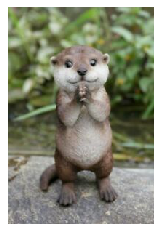

In [24]:
k_factors = [0, 10, 100]
posterior_probabilities = [0.1, 0.5, 0.9]
inputs= list(itertools.product(posterior_probabilities, k_factors))
hash_list = ['cfcd208495d565ef66e7dff9f98764da', 'c4ca4238a0b923820dcc509a6f75849b',
             'c4ca4238a0b923820dcc509a6f75849b', 'cfcd208495d565ef66e7dff9f98764da',
             'c4ca4238a0b923820dcc509a6f75849b', 'c4ca4238a0b923820dcc509a6f75849b',
             'cfcd208495d565ef66e7dff9f98764da', 'c4ca4238a0b923820dcc509a6f75849b',
             'c4ca4238a0b923820dcc509a6f75849b']
for i, inp in enumerate(inputs):
    assert (get_hash(make_decision(*inp)) == hash_list[i])
print("All tests passed! You are awesome!")
import matplotlib.image as mpimg
img = mpimg.imread('baby_otter.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()